In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

from collections import Counter

In [2]:
dup_file = '/Users/ryankuster/github/readsynth/tests/test_project3/output/copies_GCF_000005845.2_ASM584v2_genomic.fna.csv'

start = time.time()

mean = 400
upper_bound = 490
diff = upper_bound - mean
sd = int(round(0.08*mean, 0)) # using Sage Science CV of 8%
print(sd)
sd = max(sd, int(round(diff/2, 0)))
print(sd)

32
45


In [3]:
def gauss_pdf(mean, sd, x):
    pdf = (1/sd*np.sqrt(2*np.pi))*np.exp((-1/2)*((x-mean)/sd)**2)
    return pdf


def length_dict(df, mean, sd):
    '''
    create a len_dt, storing the count for each length
    '''
    len_dt = {}
    for i in range(0, mean + sd*6 + 1):
        len_dt[i] = df[df.full_length == i]['copies'].sum()

    return len_dt


def draw_dict(df, draw_ls):
    '''
    create a dictionary of draw numbers
    '''
    draw_dt = {}
    draw_ls = Counter(draw_ls)
    for i in range(min(draw_ls), max(draw_ls)+1):
        draw_counts = int(round(draw_ls[i] * .6, 0))
        data_counts = int(round(df[df.full_length == i]['copies'].sum() * 0.6, 0))
        draw_dt[i] = min(draw_counts, data_counts)

    return draw_dt


def draw_reads(df, col_names, draw_dt):
    '''
    for each fragment length, randomly draw reads
    '''
    sampled_df = pd.DataFrame(columns=col_names)
    counts = []

    for length, draws in draw_dt.items():
        tmp_df = df.loc[df['full_length'] == length]
        if len(tmp_df) == 0:
            continue
        indices = [i for i in range(len(tmp_df))]
        sampled_idx = random.choices(indices, k=draws)
        counts += [sampled_idx.count(idx) for idx in indices]
        sampled_df = pd.concat([sampled_df, tmp_df])

    sampled_df['counts'] = counts

    return sampled_df

In [4]:
df = pd.read_csv(dup_file)
col_names = [col for col in df.columns]

if len(df) == 0:
    sys.exit('no fragments produced with current settings')

modifier = 0

df['full_length'] = df['length'] + modifier
df.sort_values(['full_length'], ascending=[True], inplace=True)
df.reset_index(inplace=True, drop=True)

len_dt = length_dict(df, mean, sd)

In [5]:
a = [len_dt[i] for i in range(mean, (upper_bound+(upper_bound-mean))+1)]

avg_upper = sum(a)/len(a)
scale_by = avg_upper/gauss_pdf(mean, sd, upper_bound)

In [6]:
answers = [gauss_pdf(mean, sd, x)*scale_by for x in range(0, mean + 6*sd + 1)]
total_reads = int(round(sum(answers), 0))

In [7]:
def new_approach(mean, sd, len_dt, scale_by):
    draw_dt = {}
    
    for x in range(0, mean + 6*sd + 1):
        draw_counts = int(round(gauss_pdf(mean, sd, x)*scale_by, 0))
        data_counts = len_dt[x]
        draw_dt[x] = min(draw_counts, data_counts)
        
    return draw_dt

draw_dt = new_approach(mean, sd, len_dt, scale_by)

In [8]:
# draw_ls = np.array(np.random.normal(loc=mean,scale=sd,size=total_reads))
# draw_ls = np.rint(draw_ls).astype(np.int32)
# draw_ls = draw_ls.tolist()
# draw_dt = draw_dict(df, draw_ls)
# print(sum(draw_dt.values()))
print(time.time() - start)

0.35935401916503906


In [9]:
# sampled_df = draw_reads(df, col_names, draw_dt)

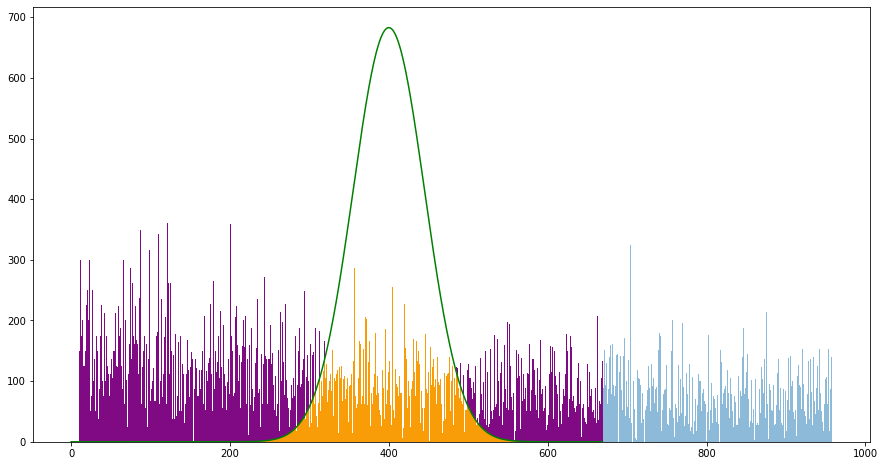

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

xls, yls = [], []

for x in range(0, (mean+(6*sd))):
    xls.append(x)
    yls.append(gauss_pdf(mean, sd, x)* scale_by)

plt.hist(df['length'], weights=df['copies'], bins=(df['length'].max() - df['length'].min()), alpha=0.5)
plt.hist(list(len_dt.keys()), weights=list(len_dt.values()), bins=(max(len_dt.keys())-min(len_dt.keys())), alpha=0.95, color='purple')
plt.hist(list(draw_dt.keys()), weights=list(draw_dt.values()), bins=(max(draw_dt.keys())-min(draw_dt.keys())), alpha=0.95, color='orange')
plt.plot(xls, yls, c="green")


(array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        5.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 7.000e+00, 7.000e+00,
        8.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 1.200e+01,
        1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.800e+01, 1.900e+01,
        2.000e+01, 2.200e+01, 2.300e+01, 2.500e+01, 2.700e+01, 2.900e+01,
        3.200e+01, 3.400e+01, 3.600e+01, 3.900e+01, 4.200e+01, 4.500e+01,
        4.800e+01, 5.200e+01, 5.600e+01, 6.000e+01, 6.400e+01, 6.800e+01,
        7.300e+01, 7.800e+01, 8.400e+01, 9.000e+01, 9.600e+01, 1.020e+02,
        1.090e+02, 1.160e+02, 1.240e+02, 1.320e+02, 1.410e+02, 1.500e+02,
        1.600e+02, 1.700e+02, 1.810e+0

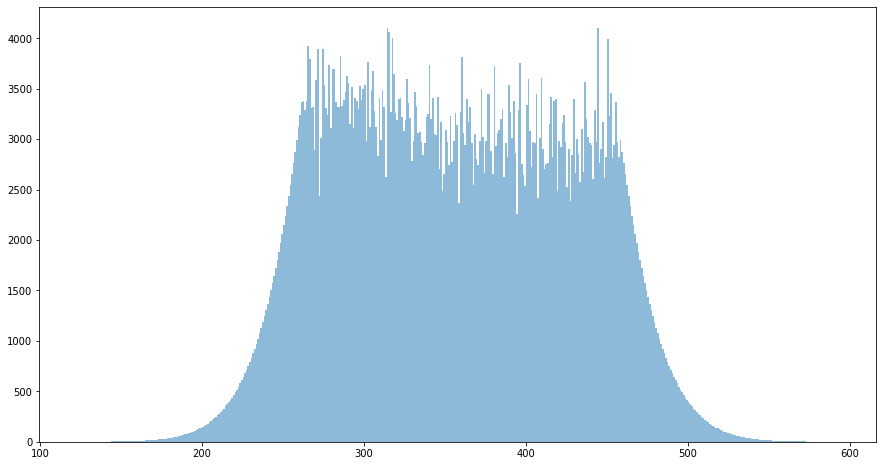

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

cop_file = '/Users/ryankuster/github/readsynth/tests/test_project4/output/sampled_chr_1.fna.csv'
df = pd.read_csv(cop_file)

plt.hist(df['full_length'], weights=df['counts'], bins=(df['full_length'].max() - df['full_length'].min()), alpha=0.5)